# Results

Lets talk about one specific results: the p-value.

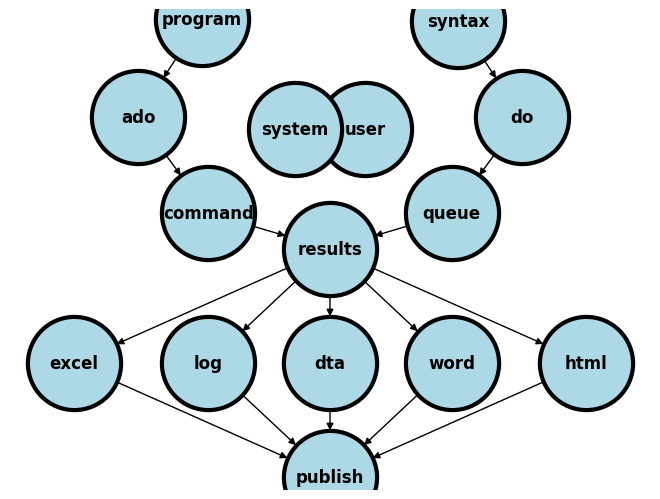

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

# P-value

The default is to report a p-value from a two-sided hypothesis test that the difference between two values is zero

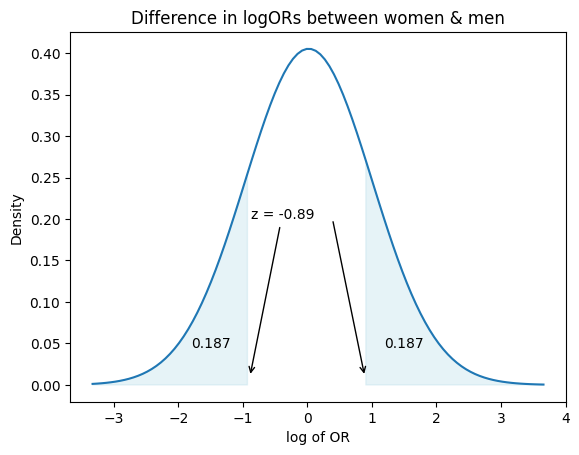

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data for the kernel density plot
data = np.random.normal(loc=0, scale=1, size=1000)

# Calculate the kernel density estimate
kde = np.linspace(data.min(), data.max(), 100)
kde_vals = norm.pdf(kde, loc=np.mean(data), scale=np.std(data))

# Create the plot
fig, ax = plt.subplots()
ax.plot(kde, kde_vals, label='Kernel Density Estimate')

# Define the critical value and significance level
critical_value = -0.89
significance_level = 0.05

# Shade the areas corresponding to the critical values
ax.fill_between(kde, kde_vals, where=(kde <= critical_value) | (kde >= -critical_value),
                color='lightblue', alpha=0.3)

# Add labels for the shaded areas
ax.text(critical_value - 0.3, 0.05, f'0.187', ha='right', va='center', fontsize=10)
ax.text(-critical_value + 0.3, 0.05, f'0.187', ha='left', va='center', fontsize=10)

# Add arrows pointing at the corresponding critical values
ax.annotate('z = -0.89', xy=(critical_value, 0.01), xytext=(critical_value + .01, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(-critical_value, 0.01), xytext=(-critical_value - 0.5, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot title and labels
ax.set_title('Difference in logORs between women & men')
ax.set_xlabel('log of OR')
ax.set_ylabel('Density')

# Display the plot
plt.show()


# Two-sided

The p-value in the above case is:

In [3]:
0.178 + 0.187

0.365

In otherwise it is the absolute value of the test statistic (z in this case) that counts

Here are three p-values worth keeping to memory:

```stata
di 2*(1-normal(abs(1)))
di 2*(1-normal(abs(2)))
di 2*(1-normal(abs(3)))
```

```stata

. di 2*(1-normal(abs(1)))
.31731051

. di 2*(1-normal(abs(2)))
.04550026

. di 2*(1-normal(abs(3)))
.0026998

. 
end of do-file

. 

```

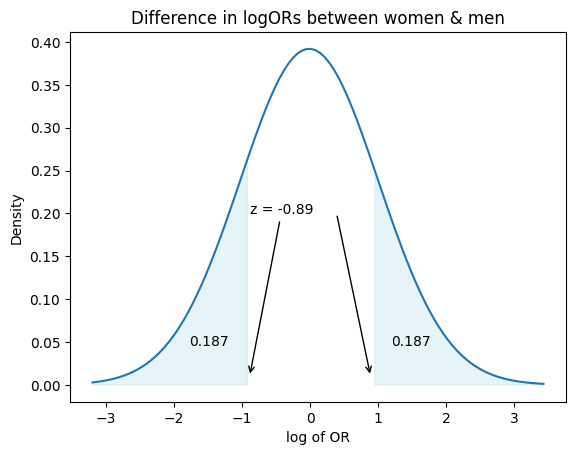

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data for the kernel density plot
data = np.random.normal(loc=0, scale=1, size=1000)

# Calculate the kernel density estimate
kde = np.linspace(data.min(), data.max(), 100)
kde_vals = norm.pdf(kde, loc=np.mean(data), scale=np.std(data))

# Create the plot
fig, ax = plt.subplots()
ax.plot(kde, kde_vals, label='Kernel Density Estimate')

# Define the critical value and significance level
critical_value = -0.89
significance_level = 0.05

# Shade the areas corresponding to the critical values
ax.fill_between(kde, kde_vals, where=(kde <= critical_value) | (kde >= -critical_value),
                color='lightblue', alpha=0.3)

# Add labels for the shaded areas
ax.text(critical_value - 0.3, 0.05, f'0.187', ha='right', va='center', fontsize=10)
ax.text(-critical_value + 0.3, 0.05, f'0.187', ha='left', va='center', fontsize=10)

# Add arrows pointing at the corresponding critical values
ax.annotate('z = -0.89', xy=(critical_value, 0.01), xytext=(critical_value + .01, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(-critical_value, 0.01), xytext=(-critical_value - 0.5, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot title and labels
ax.set_title('Difference in logORs between women & men')
ax.set_xlabel('log of OR')
ax.set_ylabel('Density')

# Display the plot
plt.show()


And here's a `flexible program' that enables a Stata 13 user to get a z-statistic, p-value, and 95% CI :

```stata
capture program drop stata13
program define stata13
    syntax varlist, test(numlist)
	
	local y: di word("`varlist'",1)
	if `test' == 1 {
		di in red "The outcome can't be tested!"
		exit 340
	}
	noi logistic `varlist'
	local x`test': di word("`varlist'",`test')	
	cls
	scalar z = _b[`x`test'']/_se[`x`test'']
	noi di "z statistic for `x`test'': " z
	scalar p = 2*(1-normal(abs(z)))
	noi di "p-value for `x`test'': " p 
	di "lower bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.025) * _se[`x`test''])
	di "upper bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.975) * _se[`x`test''])	
	lincom `x`test''

end 

use transplants, clear 
stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)


```

```stata
z statistic for gender: -.60781897
p-value for gender: .54330755
lower bound of 95% CI for gender: .63054792
upper bound of 95% CI for gender: 1.2748661

( 1)  [died]gender = 0

----------------------------------------------------------------			
died | Odds ratio   Std. err.      z	P>z	[95% conf.	interval]
-----+----------------------------------------------------------			
(1)  | .8965847   .1610239    -0.61	0.543	.6305479	1.274866
----------------------------------------------------------------			

. 
. 
end of do-file

. 

```